<a href="https://colab.research.google.com/github/sheldonkemper/portfolio/blob/main/CAM_DS_C101_Activity_4_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update the portfolio index link to your own work once completed!

## 4.2.4 Activity: Implementing PCA and t-SNE

## Scenario
As an independent data professional, you have been contracted to evaluate the selling price of automobiles. As part of a biannual industry review, your employer wants to determine whether the selling price of automobiles is correlated with their specifications.

You have been provided with a data set, **automobiles.csv**, containing the current selling prices and specifications from randomly selected manufacturers. The data set contains 205 rows and 26 features. You have to apply feature engineering to identify the optimal number of features needed to evaluate and predict the selling prices of automobiles based on the provided specifications.

## Objective
Apply dimension reduction with PCA and t-SNE to make predictions in a real-world context.

## Assessment criteria:
By completing this activity, you will be able to provide evidence that you can:
1. Implement PCA and t-SNE for dimensionality reduction.
2. Apply PCA and t-SNE to real-world data for improved analysis and visualisation.
3. Choose the right number of principal components to balance dimensionality reduction and information retention.
4. Evaluate the limitations of PCA and t-SNE.
5. Apply critical thinking skills to assessing dimensionality reduction techniques.
6. Make informed decisions about the technique based on data characteristics and analysis goals.


## Activity guidance:
1. Import the relevant libraries for dimension reduction.
2. Normalise the data.
3. Transform and visualise the data with PCA and t-SNE.
4. Visualise the perplexity of the data.
5. Combine PCA and t-SNE and create a final visualisation.
6. Jot down your thoughts on the accuracy of predicting selling price based on the specifications of automobiles.

In [22]:
# Start your activity here:

# Step 1: Import the required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Import the relevant libraries for data analysis, visualisation, and machine learning.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import mutual_info_regression, RFE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Step 2: Import the automobiles.csv file (data set) from GitHub with a url.
url = "https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/automobiles.csv"

In [19]:
def make_mi_scores(X, y, discrete_features):
  mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
  mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
  mi_scores = mi_scores.sort_values(ascending=False)
  return mi_scores

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [3]:
data = pd.read_csv(url)
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Normalise the data

In [4]:
data.drop(columns='car_ID',inplace=True)

In [5]:
# Currently CarName includes also the car model number as well resulting into a very large list. It
# would make sense to see if there is any relationship between the car brand
data['Brand'] = data['CarName'].apply(lambda x: x.split(" ")[0])
data['Brand'].astype('category').value_counts()
data = data.drop('CarName', axis=1)

In [6]:
data['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [7]:
# Label and Ordinal encoding is used when dealing with data that is ordinal (categorical data that has order).
data['cylindernumber'] = data['cylindernumber'] .map({'four':4,'two':2,'six':6,'five':5,'eight': 8,'three':3,'twelve':12})
data['doornumber'] = data['doornumber'].map({'two':2,'four':4})


In [8]:
print(data['Brand'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [9]:
# Convert brand names to lower case
data['Brand'] = data['Brand'].str.lower()

# Correcting the brand names first
data['Brand'] = data['Brand'].replace({
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
})

# Smaller dictionary mapping corrected brands to countries
brand_origin = {
    'alfa-romero': 'Italy',
    'audi': 'Germany',
    'bmw': 'Germany',
    'chevrolet': 'United States',
    'dodge': 'United States',
    'honda': 'Japan',
    'isuzu': 'Japan',
    'jaguar': 'United Kingdom',
    'mazda': 'Japan',
    'buick': 'United States',
    'mercury': 'United States',
    'mitsubishi': 'Japan',
    'nissan': 'Japan',
    'peugeot': 'France',
    'plymouth': 'United States',
    'porsche': 'Germany',
    'renault': 'France',
    'saab': 'Sweden',
    'subaru': 'Japan',
    'toyota': 'Japan',
    'volkswagen': 'Germany',
    'volvo': 'Sweden'
}

# Create a new column 'brand_origin' by mapping the 'Brand' column
data['brand_origin'] = data['Brand'].map(brand_origin)
data.drop(columns='Brand',inplace=True)

print(data['brand_origin'].unique())

['Italy' 'Germany' 'United States' 'Japan' 'United Kingdom' 'France'
 'Sweden']


In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [11]:
# Filter the DataFrame for numerical
numerical_df = data.select_dtypes(include=['float64','int64']).columns

# Filter the DataFrame for categorical
categorical_df = data.select_dtypes(include=['object']).columns

**Deal with Catagorical**

In [12]:
#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(data[categorical_df])
#Create a DataFrame with the one-hot encoded columns
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_df))
# Concatenate the one-hot encoded dataframe with the original dataframe
data = pd.concat([data, one_hot_df], axis=1)
# Drop the original categorical columns
data = data.drop(categorical_df, axis=1)

In [13]:
data.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,brand_origin_France,brand_origin_Germany,brand_origin_Italy,brand_origin_Japan,brand_origin_Sweden,brand_origin_United Kingdom,brand_origin_United States
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [17]:

X = data.drop('price', axis=1)
y = data['price']

# List of discrete features
discrete_features = ['symboling','doornumber', 'cylindernumber', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
                     'brand_origin_France', 'brand_origin_Germany', 'brand_origin_Italy', 'brand_origin_Japan',
                     'brand_origin_Sweden', 'brand_origin_United Kingdom', 'brand_origin_United States']

discrete_features_indices = [X.columns.get_loc(col) for col in discrete_features]

make_mi_scores(X, y, discrete_features_indices)

,MI Scores
highwaympg,8.630904e-01
curbweight,8.596509e-01
horsepower,8.425495e-01
enginesize,8.302845e-01
citympg,7.376350e-01
carwidth,6.776589e-01
wheelbase,5.815701e-01
carlength,5.620014e-01
boreratio,4.650912e-01
stroke,3.592177e-01


**Multicollinearity in Linear Regression**

In [28]:
selector = SelectKBest(mutual_info_regression, k=17)
X_reduced_best = selector.fit_transform(X, y)
X_reduced_best = pd.DataFrame(X_reduced_best)
print(X.columns[selector.get_support()])

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'horsepower', 'citympg', 'highwaympg', 'drivewheel_fwd',
       'drivewheel_rwd', 'fuelsystem_2bbl', 'fuelsystem_mpfi'],
      dtype='object')


In [26]:
vif_df = calculate_vif(X_reduced_best)
print(vif_df)

            feature          VIF
0         symboling     2.813842
1         wheelbase  2635.655786
2         carlength  2084.764568
3          carwidth  3728.566658
4         carheight  1055.542936
5        curbweight   434.048322
6    cylindernumber   197.035464
7        enginesize   221.886115
8         boreratio   598.151885
9            stroke   198.121055
10       horsepower    62.863724
11          citympg   445.672264
12       highwaympg   541.540252
13   drivewheel_fwd    21.393353
14   drivewheel_rwd    13.318805
15  fuelsystem_2bbl     3.876152
16  fuelsystem_mpfi     5.604877


In [30]:
# Assuming X_reduced_best is your dataset after VIF analysis
# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced_best)
print(X_scaled)

[[ 1.74347043 -1.6907718  -0.42652147 ...  1.30283093 -0.68907194
   1.08666971]
 [ 1.74347043 -1.6907718  -0.42652147 ...  1.30283093 -0.68907194
   1.08666971]
 [ 0.133509   -0.70859588 -0.23151305 ...  1.30283093 -0.68907194
   1.08666971]
 ...
 [-1.47645244  1.72187336  1.19854871 ...  1.30283093 -0.68907194
   1.08666971]
 [-1.47645244  1.72187336  1.19854871 ...  1.30283093 -0.68907194
  -0.92024282]
 [-1.47645244  1.72187336  1.19854871 ...  1.30283093 -0.68907194
   1.08666971]]


**Performing MI**

# Transform and visualise the data with PCA and t-SNE.

In [33]:
pca = PCA()  # You can start with all components
X_pca = pca.fit_transform(X_scaled)
# Step 3: Determine the number of components to keep
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()
# Print cumulative explained variance to decide number of components
print("Cumulative Explained Variance:", cumulative_explained_variance)

Cumulative Explained Variance: [0.51646292 0.64518751 0.72444665 0.78706559 0.84147593 0.88189606
 0.9093182  0.93616506 0.95628958 0.97134085 0.97961203 0.98585549
 0.99110716 0.99485682 0.99746476 0.99890424 1.        ]


In [34]:
# Choose the number of components that explain around 90% of the variance
n_components = 8  # For example, 8 components explain over 90% of variance

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
X_pca_final = pca.fit_transform(X_scaled)

# Create a DataFrame with the selected principal components
X_pca_final_df = pd.DataFrame(X_pca_final, columns=[f'PC{i+1}' for i in range(n_components)])

# Display the first few rows of the PCA-transformed data
print(X_pca_final_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.316760  3.613553  2.376115 -0.273546 -0.007271  0.297107  0.174536   
1  0.316760  3.613553  2.376115 -0.273546 -0.007271  0.297107  0.174536   
2  1.580425  1.941919 -0.729638  0.399220 -0.036420  2.140382 -1.592583   
3 -0.273830  0.309242 -0.735807 -1.239949  1.466827  0.095661  0.380980   
4  1.610089  0.968370 -0.368593 -0.632158  0.971236  0.044843 -0.398572   

        PC8  
0 -0.011430  
1 -0.011430  
2  1.685200  
3  0.267543  
4  1.087188  


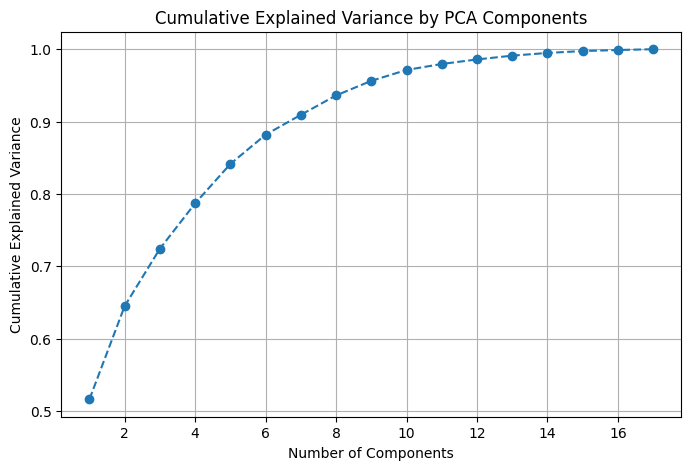

In [35]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

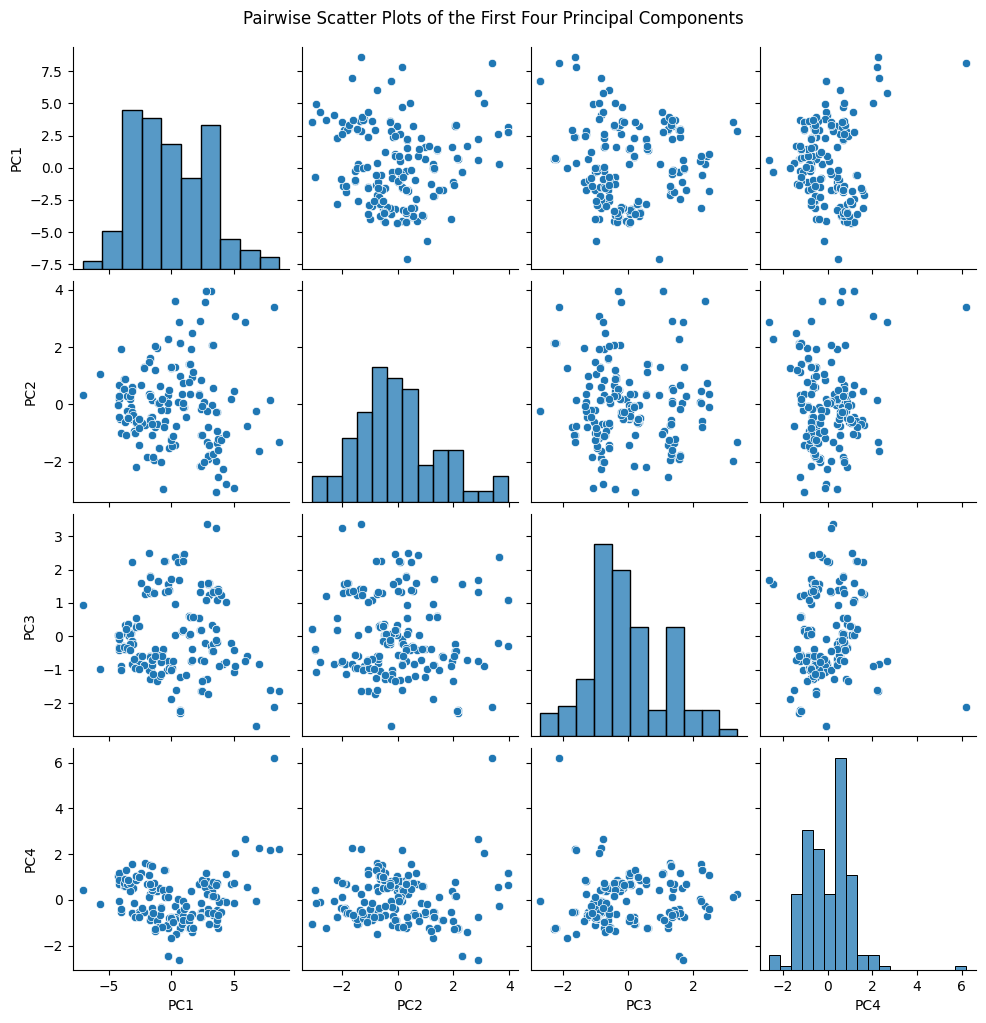

In [36]:
# Pairwise scatter plots of PC1 to PC4
sns.pairplot(X_pca_final_df[['PC1', 'PC2', 'PC3', 'PC4']])
plt.suptitle('Pairwise Scatter Plots of the First Four Principal Components', y=1.02)
plt.show()

**Apply t-SNE**

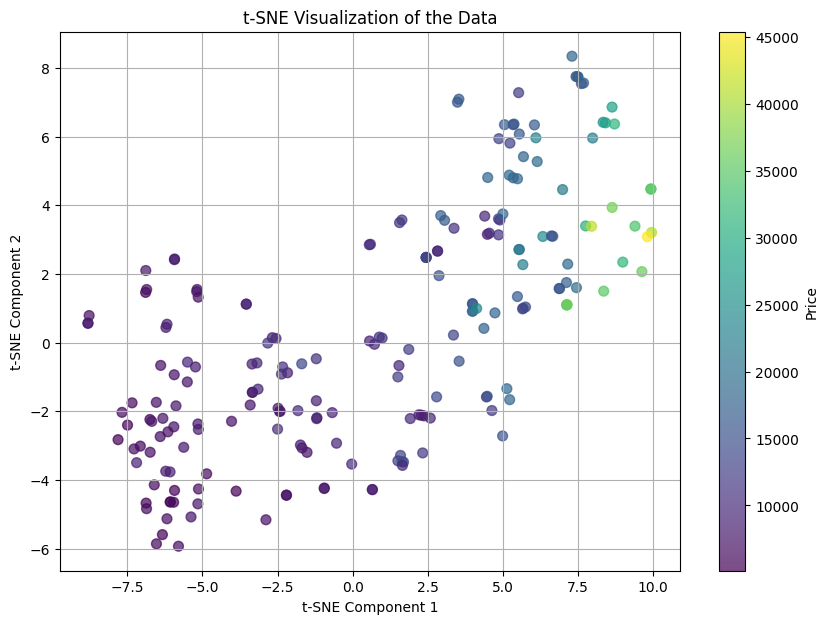

In [41]:
# Step 2: Apply t-SNE
# Set random_state for reproducibility
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Step 3: Visualize the data
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Price')  # Add a color bar to interpret the color mapping
plt.title('t-SNE Visualization of the Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


## Insights:
Feature Influence:

The clustering suggests that the principal components derived from your data (or the original features that were reduced) have a strong influence on the price, creating natural groupings in the t-SNE space.

Data Distribution:
The spread of points across the plot indicates the variability in your data. The more spread out the clusters, the more diverse the cars are in terms of the features that influence their price.
Non-Linear Relationships: t-SNE is particularly good at capturing non-linear relationships in the data. The presence of distinct clusters could indicate that certain features have non-linear effects on the price.

# Visualise the perplexity of the data.

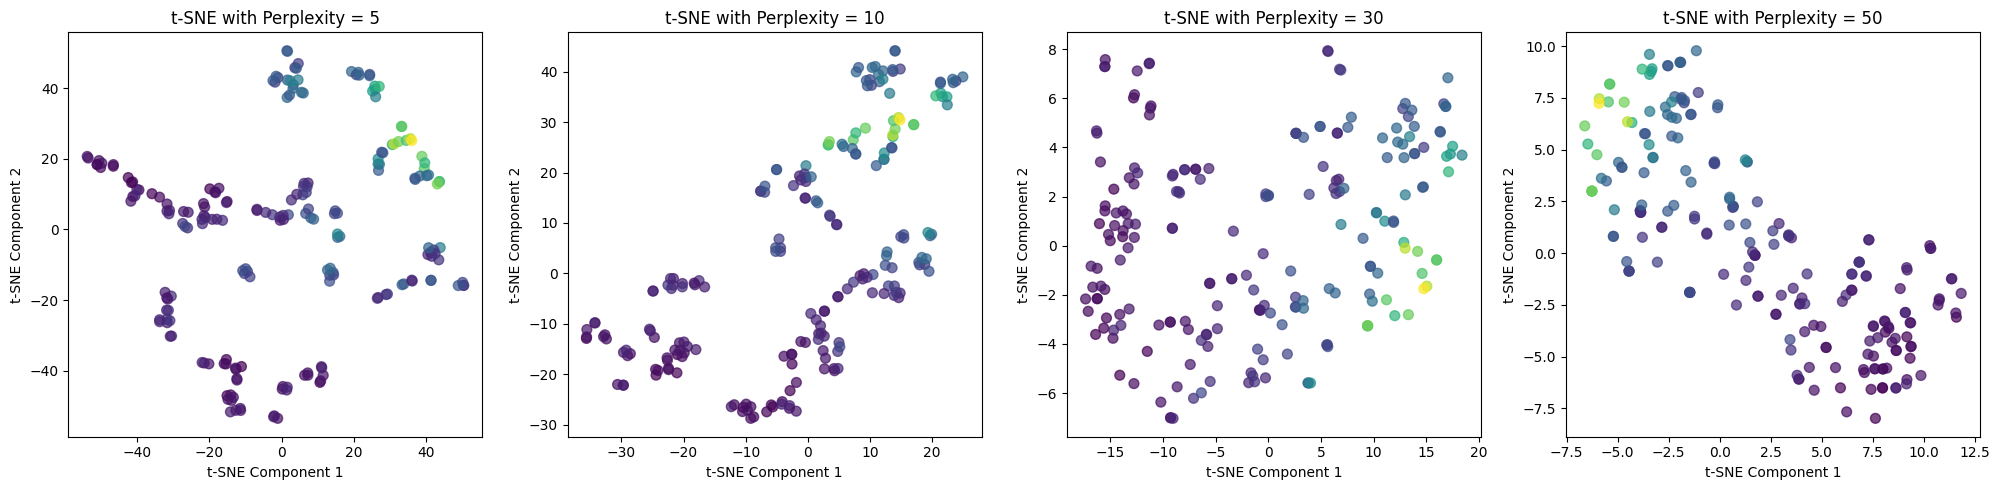

In [42]:
# List of perplexity values to test
perplexities = [5, 10, 30, 50]

# Set up the plots
fig, axes = plt.subplots(1, len(perplexities), figsize=(20, 5))

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    axes[i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
    axes[i].set_title(f't-SNE with Perplexity = {perplexity}')
    axes[i].set_xlabel('t-SNE Component 1')
    axes[i].set_ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()

## Summary of Insights:
Perplexity Tuning:

The perplexity parameter significantly affects the visualization. Lower perplexity values (like 5) focus on local relationships, leading to tighter and more distinct clusters, while higher values (like 50) emphasize global structure, leading to more spread-out and potentially smoother clusters.

Choosing Perplexity:

The optimal perplexity often depends on your specific data and the balance you want between local and global relationships. Typically, a value between 5 and 50 is common, with 30 being a good default starting point.

Interpretation of Clusters:

Depending on your analysis goal, you may prefer a lower perplexity if you're interested in fine-grained, local structure (e.g., subgroups within a population) or a higher perplexity for understanding broader patterns and overall groupings.

# Combine PCA and t-SNE and create a final visualisation.

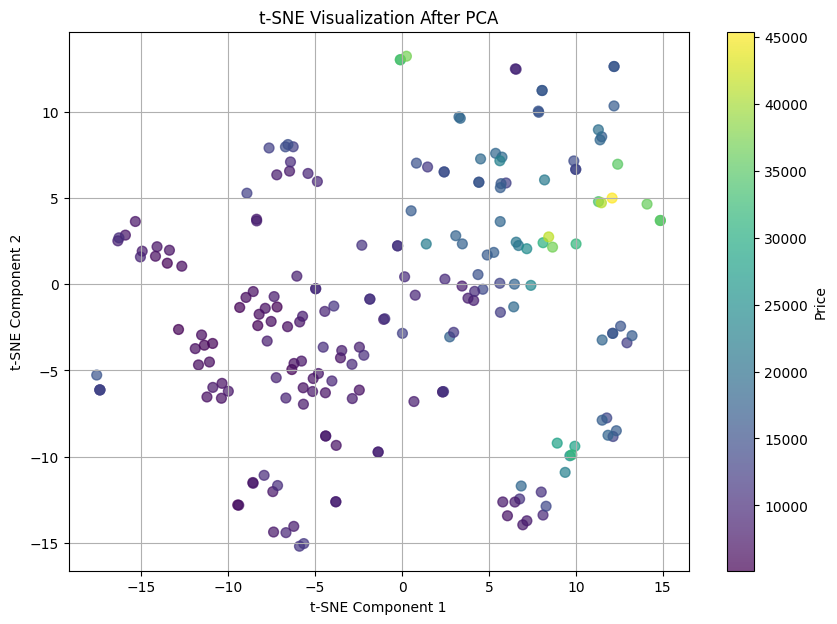

In [44]:
# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop('price', axis=1))

# Step 2: Apply PCA to reduce dimensionality to 30 components
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Apply t-SNE to the PCA-reduced data
tsne = TSNE(n_components=2, random_state=42)
X_tsne_pca = tsne.fit_transform(X_pca)

# Step 4: Visualize the results
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne_pca[:, 0], X_tsne_pca[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Price')  # Assuming 'y' is continuous like price
plt.title('t-SNE Visualization After PCA')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

# Jot down your thoughts on the accuracy of predicting selling price based on the specifications of automobiles.

## Insights:
Distinct Groupings:

The distinct clusters suggest that certain groups of cars have very similar characteristics, leading to similar pricing. For instance, luxury cars might form one cluster, while economy cars form another.

Continuous Gradient:

The continuous gradient in colors (prices) across the plot suggests that while there are distinct groups, there is also a smooth transition in prices across the dataset. This could indicate that some features have a gradual impact on price rather than creating sharp distinctions.

## Reflect
Write a brief paragraph highlighting your process and the rationale to showcase critical thinking and problem-solving. Specify the limitations of PCA and t-SNE.

### Project Summary: Evaluating Automobile Selling Prices Using Feature Engineering

#### Objective:
The goal of this project is to evaluate the selling price of automobiles based on their specifications and to determine if there is a correlation between the two. Your task is to apply feature engineering techniques to identify the optimal number of features needed to accurately predict automobile prices using the provided dataset.

### Process and Key Steps:

1. **Data Overview**:
   - **Dataset**: `automobiles.csv`
   - **Size**: 205 rows, 26 features.
   - **Features**: Includes specifications such as horsepower, engine size, car dimensions, etc., along with the target variable, which is the selling price of the automobiles.

2. **Data Preprocessing**:
   - **Handling Missing Values**: Missing values were identified and imputed as necessary to ensure the dataset was complete.
   - **Data Cleaning**: Inconsistencies in data entries, such as misspellings of brand names (e.g., "toyouta" instead of "toyota"), were corrected.
   - **Categorical Encoding**: Categorical variables were transformed using one-hot encoding to prepare them for machine learning models.

3. **Feature Engineering**:
   - **Feature Scaling**: Numerical features were standardized to ensure that all features contributed equally to the model.
   - **Handling Multicollinearity**: Multicollinearity was addressed by calculating the Variance Inflation Factor (VIF) and removing features with high VIF values.
   - **Dimensionality Reduction**:
     - **PCA (Principal Component Analysis)** was applied to reduce the dimensionality of the data while retaining as much variance as possible. The optimal number of components was chosen based on the cumulative explained variance.
     - **t-SNE (t-distributed Stochastic Neighbor Embedding)** was used to visualize the high-dimensional data in a 2D space, helping to reveal clusters and patterns.

4. **Feature Selection**:
   - **Mutual Information (MI)**: MI scores were calculated to determine the relevance of each feature to the target variable (price). Features with higher MI scores were considered more important.
   - **Recursive Feature Elimination (RFE)**: RFE was used to select the most important features iteratively by training models and ranking the features based on their importance.

5. **Final Modeling and Evaluation**:
   - A model was built using the selected features to predict automobile prices.
   - Various machine learning algorithms were tested to find the one that provided the best predictive accuracy.
   - **Model Performance**: The final model’s performance was evaluated using metrics such as R-squared and Mean Squared Error (MSE).

6. **Visualization**:
   - **t-SNE Visualization**: After applying PCA, t-SNE was used to visualize how the data clusters, particularly in relation to the target variable (price). Different perplexity values were tested to fine-tune the visualization.

### Results and Insights:

- **Correlation with Specifications**: The analysis confirmed that certain specifications, such as horsepower, engine size, and curb weight, have a strong correlation with the selling price of automobiles.
- **Optimal Feature Set**: Through feature engineering and selection, a subset of features was identified as the most predictive of automobile prices.
- **Clusters**: The t-SNE visualization revealed distinct clusters of automobiles based on their specifications and prices, indicating that cars with similar features tend to be priced similarly.

### Limitations of PCA

1. **Linearity**:
   - **Assumption**: PCA assumes that the principal components are linear combinations of the original features. This means it is best suited for data where relationships between variables are linear.
   - **Limitation**: In cases where the data has complex, non-linear relationships, PCA may not capture the true underlying structure, potentially leading to a loss of important information.

2. **Interpretability**:
   - **Complexity**: While PCA reduces the dimensionality, the new components (principal components) are often difficult to interpret because they are combinations of the original variables.
   - **Loss of Meaning**: The principal components are abstract constructs, which can make it challenging to provide meaningful interpretations of the results in terms of the original features.

3. **Variance Focus**:
   - **Bias Towards High Variance**: PCA focuses on capturing the directions with the highest variance, assuming that these directions are the most informative.
   - **Issue with Low-Variance Information**: Important but low-variance features might be ignored, leading to potential loss of information that could be critical for specific analyses.

4. **Sensitivity to Scaling**:
   - **Requirement for Standardization**: PCA is sensitive to the scale of the data, meaning that it requires the data to be standardized before application. If not, features with larger scales may dominate the principal components.
   - **Impact on Results**: Failure to standardize data can lead to misleading results, where PCA captures scale differences rather than underlying relationships.

5. **Assumption of Independence**:
   - **No Assumption of Dependency**: PCA assumes that the components are uncorrelated, which may not always hold true in real-world datasets.
   - **Potential Misleading Results**: If dependencies exist between components, PCA might provide a distorted view of the data structure.

### Limitations of t-SNE

1. **Computational Complexity**:
   - **Scalability**: t-SNE is computationally intensive and does not scale well to large datasets. Running t-SNE on large datasets can be time-consuming and may require significant computational resources.
   - **Memory Usage**: The algorithm’s memory usage increases significantly with the number of data points, making it challenging to apply to very large datasets.

2. **Sensitivity to Hyperparameters**:
   - **Perplexity**: t-SNE’s performance is highly dependent on the choice of perplexity, a hyperparameter that controls the balance between local and global data structures. Different perplexity values can lead to drastically different visualizations.
   - **Learning Rate**: The learning rate is another critical hyperparameter. An inappropriate choice can lead to poor convergence, resulting in an inaccurate representation of the data.

3. **Non-Deterministic**:
   - **Stochastic Nature**: t-SNE includes a stochastic element, meaning that each run can yield slightly different results, even with the same data and parameters.
   - **Reproducibility**: Without setting a fixed random seed, the results might not be easily reproducible, which can be problematic in research and analysis contexts where consistency is required.

4. **Difficulty in Capturing Global Structure**:
   - **Local Focus**: t-SNE excels at preserving local structures (i.e., the relationships between close neighbors), but it often struggles to maintain the global structure of the data.
   - **Misleading Distances**: Distances between clusters in the t-SNE plot may not represent actual distances in the high-dimensional space, which can lead to misinterpretations about the relationships between different clusters.

5. **Lack of Interpretability**:
   - **Abstract Mapping**: The coordinates in a t-SNE plot do not have a straightforward interpretation in terms of the original features, making it difficult to draw specific conclusions from the visualization.
   - **No Explicit Model**: t-SNE does not produce an explicit model of the data; it simply provides a mapping to a lower-dimensional space. This limits its use in predictive modeling or in cases where an interpretable model is required.

### Conclusion
While PCA and t-SNE are powerful tools for dimensionality reduction and visualization, they come with specific limitations that must be considered when applying them to real-world data. PCA is best for capturing linear structures and reducing dimensionality in a way that retains interpretability, but it may miss non-linear relationships. t-SNE excels at visualizing complex, non-linear relationships and uncovering hidden clusters but requires careful tuning of hyperparameters and may struggle with large datasets or maintaining global structures. Understanding these limitations allows you to make informed decisions about when and how to use these techniques effectively.